<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

<ipython-input-2-b7d446354769>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [4]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [7]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import io
import requests

# Fetch and load the datasets from the provided URLs
URL_features = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
URL_labels = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Load the features data (dataset_part_3.csv)
response_features = requests.get(URL_features)
X = pd.read_csv(io.StringIO(response_features.text))

# Load the labels data (dataset_part_2.csv)
response_labels = requests.get(URL_labels)
data = pd.read_csv(io.StringIO(response_labels.text))

# Display the first few rows of the original DataFrame to show the 'Class' column
print("Original DataFrame head:")
print(data.head())
print("\n" + "-"*30 + "\n")

# TASK 1: Create a NumPy array from the 'Class' column
# We select the 'Class' column from the labels DataFrame and then apply the .to_numpy() method
# The resulting array Y will contain the target labels for our models (0s and 1s)
Y = data['Class'].to_numpy()

# Print the type and the first 10 elements of Y to verify the result
print("The created NumPy array Y:")
print(Y[:10])
print("\n" + "-"*30 + "\n")
print(f"The type of Y is: {type(Y)}")


Original DataFrame head:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -8

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import io
import requests
from sklearn import preprocessing

# Fetch and load the datasets from the provided URLs
URL_features = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
URL_labels = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Load the features data (dataset_part_3.csv)
response_features = requests.get(URL_features)
X = pd.read_csv(io.StringIO(response_features.text))

# Load the labels data (dataset_part_2.csv)
response_labels = requests.get(URL_labels)
data = pd.read_csv(io.StringIO(response_labels.text))

# Display the first few rows of the original DataFrame to show the 'Class' column
print("Original DataFrame head:")
print(data.head())
print("\n" + "-"*30 + "\n")

# TASK 1: Create a NumPy array from the 'Class' column
# We select the 'Class' column from the labels DataFrame and then apply the .to_numpy() method
# The resulting array Y will contain the target labels for our models (0s and 1s)
Y = data['Class'].to_numpy()

# Print the type and the first 10 elements of Y to verify the result
print("The created NumPy array Y:")
print(Y[:10])
print("\n" + "-"*30 + "\n")
print(f"The type of Y is: {type(Y)}")
print("\n" + "="*50 + "\n")

# TASK 2: Standardize the data in X
# We will use the StandardScaler from scikit-learn's preprocessing module
print("Standardizing the features in X...")
transform = preprocessing.StandardScaler()
# The fit_transform method computes the mean and standard deviation of X
# and then scales the data accordingly. The result is reassigned to X.
X = transform.fit_transform(X)

# Print the first few rows of the standardized X to verify the result
print("First 5 rows of standardized X:")
print(X[:5])
print("\n" + "-"*30 + "\n")
print(f"The shape of X is now: {X.shape}")


Original DataFrame head:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -8

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import io
import requests
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Fetch and load the datasets from the provided URLs
URL_features = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
URL_labels = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Load the features data (dataset_part_3.csv)
response_features = requests.get(URL_features)
X = pd.read_csv(io.StringIO(response_features.text))

# Load the labels data (dataset_part_2.csv)
response_labels = requests.get(URL_labels)
data = pd.read_csv(io.StringIO(response_labels.text))

# Display the first few rows of the original DataFrame to show the 'Class' column
print("Original DataFrame head:")
print(data.head())
print("\n" + "-"*30 + "\n")

# TASK 1: Create a NumPy array from the 'Class' column
# We select the 'Class' column from the labels DataFrame and then apply the .to_numpy() method
# The resulting array Y will contain the target labels for our models (0s and 1s)
Y = data['Class'].to_numpy()

# Print the type and the first 10 elements of Y to verify the result
print("The created NumPy array Y:")
print(Y[:10])
print("\n" + "-"*30 + "\n")
print(f"The type of Y is: {type(Y)}")
print("\n" + "="*50 + "\n")

# TASK 2: Standardize the data in X
# We will use the StandardScaler from scikit-learn's preprocessing module
print("Standardizing the features in X...")
transform = preprocessing.StandardScaler()
# The fit_transform method computes the mean and standard deviation of X
# and then scales the data accordingly. The result is reassigned to X.
X = transform.fit_transform(X)

# Print the first few rows of the standardized X to verify the result
print("First 5 rows of standardized X:")
print(X[:5])
print("\n" + "-"*30 + "\n")
print(f"The shape of X is now: {X.shape}")
print("\n" + "="*50 + "\n")

# TASK 3: Split the data into training and test sets
# We use a test_size of 0.2 to allocate 20% of the data for testing.
# random_state is set to 2 for reproducibility.
print("Splitting data into training and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Print the shapes of the newly created datasets to verify the split
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of Y_test: {Y_test.shape}")


Original DataFrame head:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -8

we can see we only have 18 test samples.


In [16]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [17]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [18]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import io
import requests
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Fetch and load the datasets from the provided URLs
URL_features = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
URL_labels = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Load the features data (dataset_part_3.csv)
response_features = requests.get(URL_features)
X = pd.read_csv(io.StringIO(response_features.text))

# Load the labels data (dataset_part_2.csv)
response_labels = requests.get(URL_labels)
data = pd.read_csv(io.StringIO(response_labels.text))

# Display the first few rows of the original DataFrame to show the 'Class' column
print("Original DataFrame head:")
print(data.head())
print("\n" + "-"*30 + "\n")

# TASK 1: Create a NumPy array from the 'Class' column
# We select the 'Class' column from the labels DataFrame and then apply the .to_numpy() method
# The resulting array Y will contain the target labels for our models (0s and 1s)
Y = data['Class'].to_numpy()

# Print the type and the first 10 elements of Y to verify the result
print("The created NumPy array Y:")
print(Y[:10])
print("\n" + "-"*30 + "\n")
print(f"The type of Y is: {type(Y)}")
print("\n" + "="*50 + "\n")

# TASK 2: Standardize the data in X
# We will use the StandardScaler from scikit-learn's preprocessing module
print("Standardizing the features in X...")
transform = preprocessing.StandardScaler()
# The fit_transform method computes the mean and standard deviation of X
# and then scales the data accordingly. The result is reassigned to X.
X = transform.fit_transform(X)

# Print the first few rows of the standardized X to verify the result
print("First 5 rows of standardized X:")
print(X[:5])
print("\n" + "-"*30 + "\n")
print(f"The shape of X is now: {X.shape}")
print("\n" + "="*50 + "\n")

# TASK 3: Split the data into training and test sets
# We use a test_size of 0.2 to allocate 20% of the data for testing.
# random_state is set to 2 for reproducibility.
print("Splitting data into training and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Print the shapes of the newly created datasets to verify the split
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of Y_test: {Y_test.shape}")
print("\n" + "="*50 + "\n")

# TASK 4: Find the best parameters for Logistic Regression using GridSearchCV
print("Finding the best hyperparameters for Logistic Regression...")

# Define the parameters to be tuned
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

# Create a Logistic Regression object
lr=LogisticRegression()

# Create a GridSearchCV object with cross-validation (cv=10)
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the GridSearchCV object to the training data to find the best parameters
logreg_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", logreg_cv.best_params_)
print("Accuracy:", logreg_cv.best_score_)


Original DataFrame head:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -8

## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import io
import requests
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fetch and load the datasets from the provided URLs
URL_features = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
URL_labels = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Load the features data (dataset_part_3.csv)
response_features = requests.get(URL_features)
X = pd.read_csv(io.StringIO(response_features.text))

# Load the labels data (dataset_part_2.csv)
response_labels = requests.get(URL_labels)
data = pd.read_csv(io.StringIO(response_labels.text))

# Display the first few rows of the original DataFrame to show the 'Class' column
print("Original DataFrame head:")
print(data.head())
print("\n" + "-"*30 + "\n")

# TASK 1: Create a NumPy array from the 'Class' column
# We select the 'Class' column from the labels DataFrame and then apply the .to_numpy() method
# The resulting array Y will contain the target labels for our models (0s and 1s)
Y = data['Class'].to_numpy()

# Print the type and the first 10 elements of Y to verify the result
print("The created NumPy array Y:")
print(Y[:10])
print("\n" + "-"*30 + "\n")
print(f"The type of Y is: {type(Y)}")
print("\n" + "="*50 + "\n")

# TASK 2: Standardize the data in X
# We will use the StandardScaler from scikit-learn's preprocessing module
print("Standardizing the features in X...")
transform = preprocessing.StandardScaler()
# The fit_transform method computes the mean and standard deviation of X
# and then scales the data accordingly. The result is reassigned to X.
X = transform.fit_transform(X)

# Print the first few rows of the standardized X to verify the result
print("First 5 rows of standardized X:")
print(X[:5])
print("\n" + "-"*30 + "\n")
print(f"The shape of X is now: {X.shape}")
print("\n" + "="*50 + "\n")

# TASK 3: Split the data into training and test sets
# We use a test_size of 0.2 to allocate 20% of the data for testing.
# random_state is set to 2 for reproducibility.
print("Splitting data into training and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Print the shapes of the newly created datasets to verify the split
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of Y_test: {Y_test.shape}")
print("\n" + "="*50 + "\n")

# TASK 4: Find the best parameters for Logistic Regression using GridSearchCV
print("Finding the best hyperparameters for Logistic Regression...")

# Define the parameters to be tuned
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

# Create a Logistic Regression object
lr=LogisticRegression()

# Create a GridSearchCV object with cross-validation (cv=10)
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the GridSearchCV object to the training data to find the best parameters
logreg_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", logreg_cv.best_params_)
print("Accuracy:", logreg_cv.best_score_)
print("\n" + "="*50 + "\n")

# TASK 5: Calculate the accuracy on the test data
print("Calculating accuracy on the test data...")
# Use the best estimator from GridSearchCV to predict on the test set
Y_pred = logreg_cv.predict(X_test)
# Calculate and print the accuracy score
test_accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy on test data: {test_accuracy:.4f}")


Original DataFrame head:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -8

Lets look at the confusion matrix:


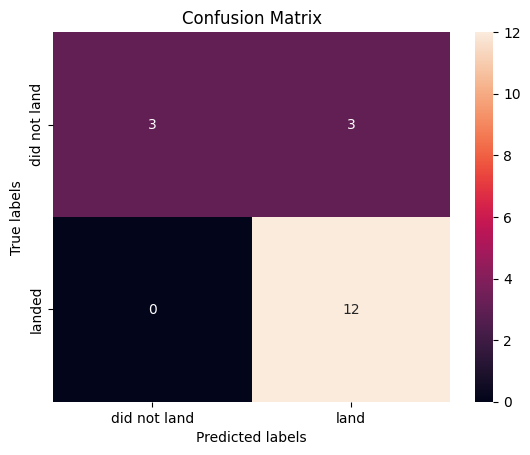

In [23]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

Original DataFrame head:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -8

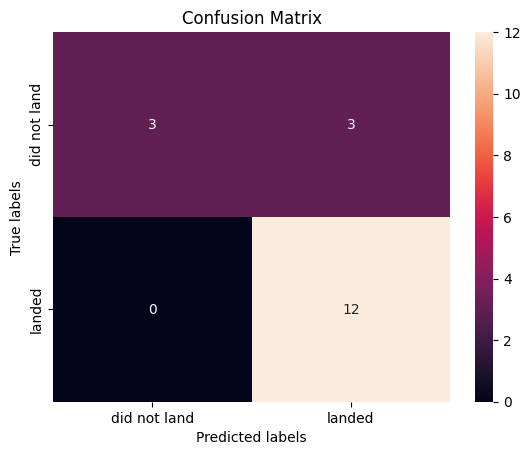



Finding the best hyperparameters for SVM...
Tuned hyperparameters (best parameters):  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy: 0.8482142857142856


In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import io
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# This function is to plot the confusion matrix.
def plot_confusion_matrix(y, y_predict):
    "This function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g')  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'landed']);
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Fetch and load the datasets from the provided URLs
URL_features = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
URL_labels = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Load the features data (dataset_part_3.csv)
response_features = requests.get(URL_features)
X = pd.read_csv(io.StringIO(response_features.text))

# Load the labels data (dataset_part_2.csv)
response_labels = requests.get(URL_labels)
data = pd.read_csv(io.StringIO(response_labels.text))

# Display the first few rows of the original DataFrame to show the 'Class' column
print("Original DataFrame head:")
print(data.head())
print("\n" + "-"*30 + "\n")

# TASK 1: Create a NumPy array from the 'Class' column
# We select the 'Class' column from the labels DataFrame and then apply the .to_numpy() method
# The resulting array Y will contain the target labels for our models (0s and 1s)
Y = data['Class'].to_numpy()

# Print the type and the first 10 elements of Y to verify the result
print("The created NumPy array Y:")
print(Y[:10])
print("\n" + "-"*30 + "\n")
print(f"The type of Y is: {type(Y)}")
print("\n" + "="*50 + "\n")

# TASK 2: Standardize the data in X
# We will use the StandardScaler from scikit-learn's preprocessing module
print("Standardizing the features in X...")
transform = preprocessing.StandardScaler()
# The fit_transform method computes the mean and standard deviation of X
# and then scales the data accordingly. The result is reassigned to X.
X = transform.fit_transform(X)

# Print the first few rows of the standardized X to verify the result
print("First 5 rows of standardized X:")
print(X[:5])
print("\n" + "-"*30 + "\n")
print(f"The shape of X is now: {X.shape}")
print("\n" + "="*50 + "\n")

# TASK 3: Split the data into training and test sets
# We use a test_size of 0.2 to allocate 20% of the data for testing.
# random_state is set to 2 for reproducibility.
print("Splitting data into training and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Print the shapes of the newly created datasets to verify the split
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of Y_test: {Y_test.shape}")
print("\n" + "="*50 + "\n")

# TASK 4: Find the best parameters for Logistic Regression using GridSearchCV
print("Finding the best hyperparameters for Logistic Regression...")

# Define the parameters to be tuned
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

# Create a Logistic Regression object
lr=LogisticRegression()

# Create a GridSearchCV object with cross-validation (cv=10)
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the GridSearchCV object to the training data to find the best parameters
logreg_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", logreg_cv.best_params_)
print("Accuracy:", logreg_cv.best_score_)
print("\n" + "="*50 + "\n")

# TASK 5: Calculate the accuracy on the test data
print("Calculating accuracy on the test data...")
# Use the best estimator from GridSearchCV to predict on the test set
Y_pred = logreg_cv.predict(X_test)
# Calculate and print the accuracy score
test_accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy on test data: {test_accuracy:.4f}")
print("\n" + "="*50 + "\n")

# Task: Look at the confusion matrix
print("Generating Confusion Matrix for Logistic Regression...")
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)
print("\n" + "="*50 + "\n")

# TASK 6: Find the best parameters for Support Vector Machine (SVM) using GridSearchCV
print("Finding the best hyperparameters for SVM...")

# Define the parameters to be tuned for SVM
parameters = {'kernel':('linear', 'rbf','poly','sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
# Create an SVM object
svm = SVC()

# Create a GridSearchCV object with cross-validation (cv=10)
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the GridSearchCV object to the training data
svm_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", svm_cv.best_params_)
print("Accuracy:", svm_cv.best_score_)


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


Original DataFrame head:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -8

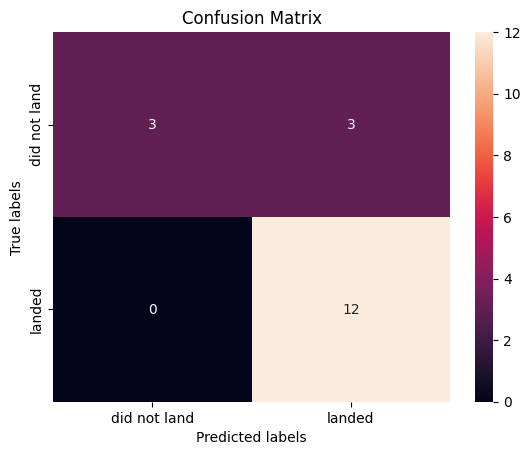



Finding the best hyperparameters for SVM...
Tuned hyperparameters (best parameters):  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy: 0.8482142857142856


Calculating accuracy on the SVM test data...
Accuracy on SVM test data: 0.8333


In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import io
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# This function is to plot the confusion matrix.
def plot_confusion_matrix(y, y_predict):
    "This function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g')  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'landed']);
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Fetch and load the datasets from the provided URLs
URL_features = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
URL_labels = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Load the features data (dataset_part_3.csv)
response_features = requests.get(URL_features)
X = pd.read_csv(io.StringIO(response_features.text))

# Load the labels data (dataset_part_2.csv)
response_labels = requests.get(URL_labels)
data = pd.read_csv(io.StringIO(response_labels.text))

# Display the first few rows of the original DataFrame to show the 'Class' column
print("Original DataFrame head:")
print(data.head())
print("\n" + "-"*30 + "\n")

# TASK 1: Create a NumPy array from the 'Class' column
# We select the 'Class' column from the labels DataFrame and then apply the .to_numpy() method
# The resulting array Y will contain the target labels for our models (0s and 1s)
Y = data['Class'].to_numpy()

# Print the type and the first 10 elements of Y to verify the result
print("The created NumPy array Y:")
print(Y[:10])
print("\n" + "-"*30 + "\n")
print(f"The type of Y is: {type(Y)}")
print("\n" + "="*50 + "\n")

# TASK 2: Standardize the data in X
# We will use the StandardScaler from scikit-learn's preprocessing module
print("Standardizing the features in X...")
transform = preprocessing.StandardScaler()
# The fit_transform method computes the mean and standard deviation of X
# and then scales the data accordingly. The result is reassigned to X.
X = transform.fit_transform(X)

# Print the first few rows of the standardized X to verify the result
print("First 5 rows of standardized X:")
print(X[:5])
print("\n" + "-"*30 + "\n")
print(f"The shape of X is now: {X.shape}")
print("\n" + "="*50 + "\n")

# TASK 3: Split the data into training and test sets
# We use a test_size of 0.2 to allocate 20% of the data for testing.
# random_state is set to 2 for reproducibility.
print("Splitting data into training and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Print the shapes of the newly created datasets to verify the split
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of Y_test: {Y_test.shape}")
print("\n" + "="*50 + "\n")

# TASK 4: Find the best parameters for Logistic Regression using GridSearchCV
print("Finding the best hyperparameters for Logistic Regression...")

# Define the parameters to be tuned
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

# Create a Logistic Regression object
lr=LogisticRegression()

# Create a GridSearchCV object with cross-validation (cv=10)
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the GridSearchCV object to the training data to find the best parameters
logreg_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", logreg_cv.best_params_)
print("Accuracy:", logreg_cv.best_score_)
print("\n" + "="*50 + "\n")

# TASK 5: Calculate the accuracy on the test data
print("Calculating accuracy on the test data...")
# Use the best estimator from GridSearchCV to predict on the test set
Y_pred = logreg_cv.predict(X_test)
# Calculate and print the accuracy score
test_accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy on test data: {test_accuracy:.4f}")
print("\n" + "="*50 + "\n")

# Task: Look at the confusion matrix
print("Generating Confusion Matrix for Logistic Regression...")
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)
print("\n" + "="*50 + "\n")

# TASK 6: Find the best parameters for Support Vector Machine (SVM) using GridSearchCV
print("Finding the best hyperparameters for SVM...")

# Define the parameters to be tuned for SVM
parameters = {'kernel':('linear', 'rbf','poly','sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
# Create an SVM object
svm = SVC()

# Create a GridSearchCV object with cross-validation (cv=10)
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the GridSearchCV object to the training data
svm_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", svm_cv.best_params_)
print("Accuracy:", svm_cv.best_score_)
print("\n" + "="*50 + "\n")

# TASK 7: Calculate the accuracy on the test data for the SVM model
print("Calculating accuracy on the SVM test data...")
# Use the score method of the fitted GridSearchCV object to get the accuracy
svm_test_accuracy = svm_cv.score(X_test, Y_test)
print(f"Accuracy on SVM test data: {svm_test_accuracy:.4f}")


We can plot the confusion matrix


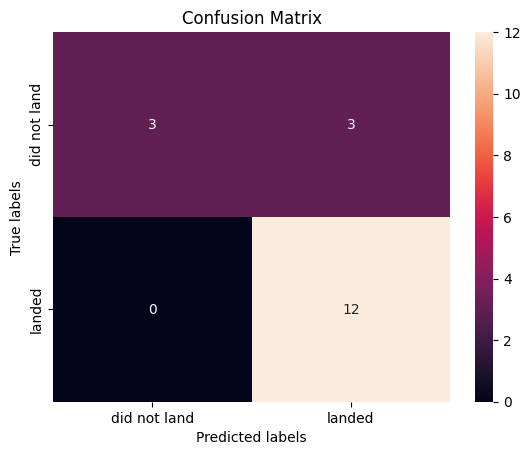

In [26]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

Original DataFrame head:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -8

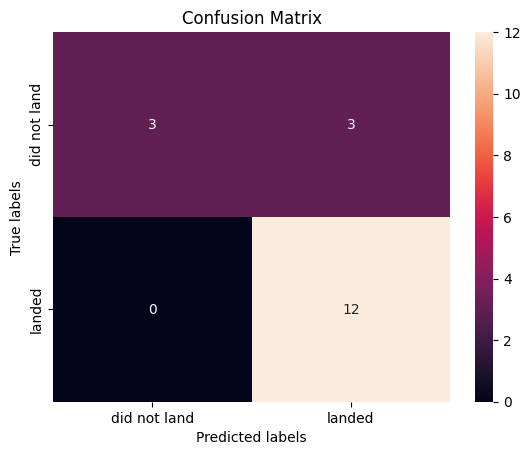



Finding the best hyperparameters for SVM...
Tuned hyperparameters (best parameters):  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy: 0.8482142857142856


Calculating accuracy on the SVM test data...
Accuracy on SVM test data: 0.8333


Generating Confusion Matrix for SVM...


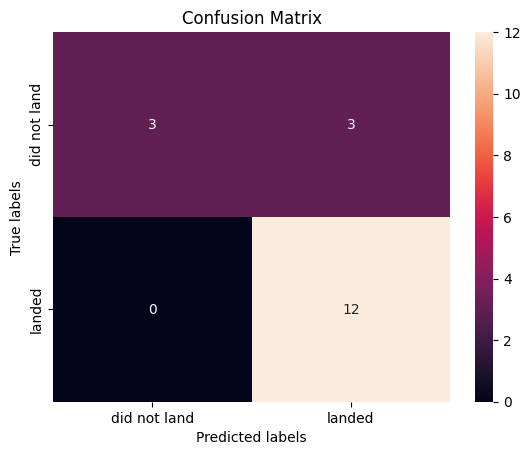



Finding the best hyperparameters for a Decision Tree Classifier...
Tuned hyperparameters (best parameters):  {'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Accuracy: 0.8767857142857143


In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import io
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# This function is to plot the confusion matrix.
def plot_confusion_matrix(y, y_predict):
    "This function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g')  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'landed']);
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Fetch and load the datasets from the provided URLs
URL_features = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
URL_labels = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Load the features data (dataset_part_3.csv)
response_features = requests.get(URL_features)
X = pd.read_csv(io.StringIO(response_features.text))

# Load the labels data (dataset_part_2.csv)
response_labels = requests.get(URL_labels)
data = pd.read_csv(io.StringIO(response_labels.text))

# Display the first few rows of the original DataFrame to show the 'Class' column
print("Original DataFrame head:")
print(data.head())
print("\n" + "-"*30 + "\n")

# TASK 1: Create a NumPy array from the 'Class' column
# We select the 'Class' column from the labels DataFrame and then apply the .to_numpy() method
# The resulting array Y will contain the target labels for our models (0s and 1s)
Y = data['Class'].to_numpy()

# Print the type and the first 10 elements of Y to verify the result
print("The created NumPy array Y:")
print(Y[:10])
print("\n" + "-"*30 + "\n")
print(f"The type of Y is: {type(Y)}")
print("\n" + "="*50 + "\n")

# TASK 2: Standardize the data in X
# We will use the StandardScaler from scikit-learn's preprocessing module
print("Standardizing the features in X...")
transform = preprocessing.StandardScaler()
# The fit_transform method computes the mean and standard deviation of X
# and then scales the data accordingly. The result is reassigned to X.
X = transform.fit_transform(X)

# Print the first few rows of the standardized X to verify the result
print("First 5 rows of standardized X:")
print(X[:5])
print("\n" + "-"*30 + "\n")
print(f"The shape of X is now: {X.shape}")
print("\n" + "="*50 + "\n")

# TASK 3: Split the data into training and test sets
# We use a test_size of 0.2 to allocate 20% of the data for testing.
# random_state is set to 2 for reproducibility.
print("Splitting data into training and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Print the shapes of the newly created datasets to verify the split
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of Y_test: {Y_test.shape}")
print("\n" + "="*50 + "\n")

# TASK 4: Find the best parameters for Logistic Regression using GridSearchCV
print("Finding the best hyperparameters for Logistic Regression...")

# Define the parameters to be tuned
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

# Create a Logistic Regression object
lr=LogisticRegression()

# Create a GridSearchCV object with cross-validation (cv=10)
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the GridSearchCV object to the training data to find the best parameters
logreg_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", logreg_cv.best_params_)
print("Accuracy:", logreg_cv.best_score_)
print("\n" + "="*50 + "\n")

# TASK 5: Calculate the accuracy on the test data
print("Calculating accuracy on the test data...")
# Use the best estimator from GridSearchCV to predict on the test set
Y_pred = logreg_cv.predict(X_test)
# Calculate and print the accuracy score
test_accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy on test data: {test_accuracy:.4f}")
print("\n" + "="*50 + "\n")

# Task: Look at the confusion matrix
print("Generating Confusion Matrix for Logistic Regression...")
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)
print("\n" + "="*50 + "\n")

# TASK 6: Find the best parameters for Support Vector Machine (SVM) using GridSearchCV
print("Finding the best hyperparameters for SVM...")

# Define the parameters to be tuned for SVM
parameters = {'kernel':('linear', 'rbf','poly','sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
# Create an SVM object
svm = SVC()

# Create a GridSearchCV object with cross-validation (cv=10)
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the GridSearchCV object to the training data
svm_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", svm_cv.best_params_)
print("Accuracy:", svm_cv.best_score_)
print("\n" + "="*50 + "\n")

# TASK 7: Calculate the accuracy on the test data for the SVM model
print("Calculating accuracy on the SVM test data...")
# Use the score method of the fitted GridSearchCV object to get the accuracy
svm_test_accuracy = svm_cv.score(X_test, Y_test)
print(f"Accuracy on SVM test data: {svm_test_accuracy:.4f}")
print("\n" + "="*50 + "\n")

# Task: Plot the confusion matrix for the SVM model
print("Generating Confusion Matrix for SVM...")
yhat_svm = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_svm)
print("\n" + "="*50 + "\n")

# TASK 8: Find the best parameters for a Decision Tree Classifier using GridSearchCV
print("Finding the best hyperparameters for a Decision Tree Classifier...")

# Define the parameters to be tuned for the Decision Tree
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1,10)],
              'max_features': ['sqrt'], # 'auto' is deprecated, 'sqrt' is the modern equivalent
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}
# Create a Decision Tree Classifier object
tree = DecisionTreeClassifier()

# Create a GridSearchCV object with cross-validation (cv=10)
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the GridSearchCV object to the training data
tree_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", tree_cv.best_params_)
print("Accuracy:", tree_cv.best_score_)


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


We can plot the confusion matrix


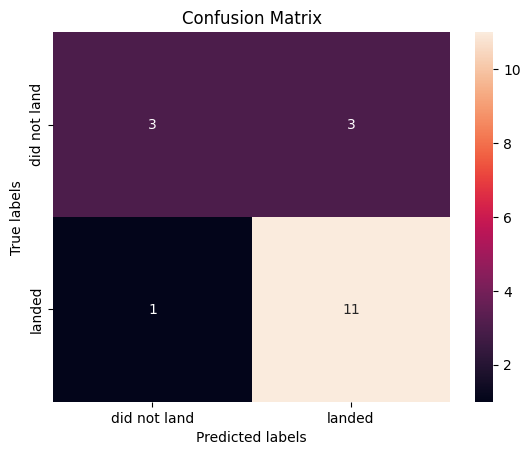

In [28]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

Original DataFrame head:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -8

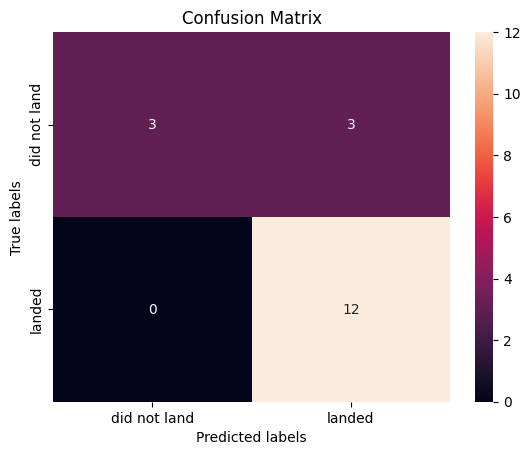



Finding the best hyperparameters for SVM...
Tuned hyperparameters (best parameters):  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy: 0.8482142857142856


Calculating accuracy on the SVM test data...
Accuracy on SVM test data: 0.8333


Generating Confusion Matrix for SVM...


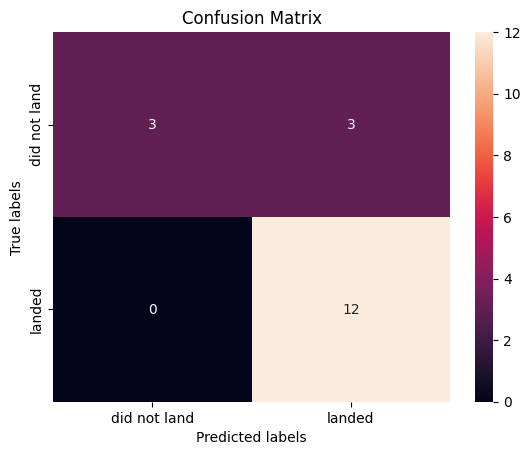



Finding the best hyperparameters for a Decision Tree Classifier...
Tuned hyperparameters (best parameters):  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy: 0.875


Calculating accuracy on the Decision Tree test data...
Accuracy on Decision Tree test data: 0.8333


Generating Confusion Matrix for Decision Tree...


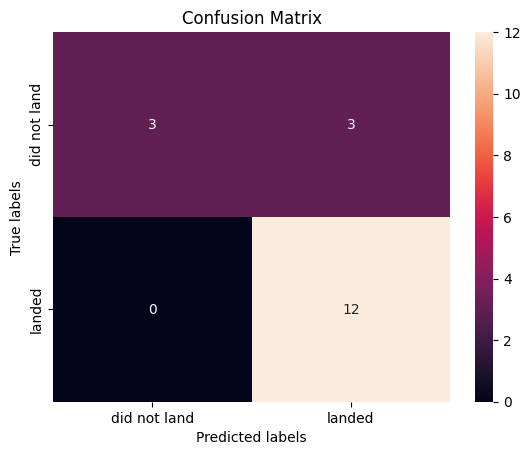



Finding the best hyperparameters for a K-Nearest Neighbors (KNN) Classifier...
Tuned hyperparameters (best parameters):  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy: 0.8482142857142858


In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import io
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# This function is to plot the confusion matrix.
def plot_confusion_matrix(y, y_predict):
    "This function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g')  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'landed']);
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Fetch and load the datasets from the provided URLs
URL_features = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
URL_labels = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Load the features data (dataset_part_3.csv)
response_features = requests.get(URL_features)
X = pd.read_csv(io.StringIO(response_features.text))

# Load the labels data (dataset_part_2.csv)
response_labels = requests.get(URL_labels)
data = pd.read_csv(io.StringIO(response_labels.text))

# Display the first few rows of the original DataFrame to show the 'Class' column
print("Original DataFrame head:")
print(data.head())
print("\n" + "-"*30 + "\n")

# TASK 1: Create a NumPy array from the 'Class' column
# We select the 'Class' column from the labels DataFrame and then apply the .to_numpy() method
# The resulting array Y will contain the target labels for our models (0s and 1s)
Y = data['Class'].to_numpy()

# Print the type and the first 10 elements of Y to verify the result
print("The created NumPy array Y:")
print(Y[:10])
print("\n" + "-"*30 + "\n")
print(f"The type of Y is: {type(Y)}")
print("\n" + "="*50 + "\n")

# TASK 2: Standardize the data in X
# We will use the StandardScaler from scikit-learn's preprocessing module
print("Standardizing the features in X...")
transform = preprocessing.StandardScaler()
# The fit_transform method computes the mean and standard deviation of X
# and then scales the data accordingly. The result is reassigned to X.
X = transform.fit_transform(X)

# Print the first few rows of the standardized X to verify the result
print("First 5 rows of standardized X:")
print(X[:5])
print("\n" + "-"*30 + "\n")
print(f"The shape of X is now: {X.shape}")
print("\n" + "="*50 + "\n")

# TASK 3: Split the data into training and test sets
# We use a test_size of 0.2 to allocate 20% of the data for testing.
# random_state is set to 2 for reproducibility.
print("Splitting data into training and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Print the shapes of the newly created datasets to verify the split
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of Y_test: {Y_test.shape}")
print("\n" + "="*50 + "\n")

# TASK 4: Find the best parameters for Logistic Regression using GridSearchCV
print("Finding the best hyperparameters for Logistic Regression...")

# Define the parameters to be tuned
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

# Create a Logistic Regression object
lr=LogisticRegression()

# Create a GridSearchCV object with cross-validation (cv=10)
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the GridSearchCV object to the training data to find the best parameters
logreg_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", logreg_cv.best_params_)
print("Accuracy:", logreg_cv.best_score_)
print("\n" + "="*50 + "\n")

# TASK 5: Calculate the accuracy on the test data
print("Calculating accuracy on the test data...")
# Use the best estimator from GridSearchCV to predict on the test set
Y_pred = logreg_cv.predict(X_test)
# Calculate and print the accuracy score
test_accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy on test data: {test_accuracy:.4f}")
print("\n" + "="*50 + "\n")

# Task: Look at the confusion matrix
print("Generating Confusion Matrix for Logistic Regression...")
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)
print("\n" + "="*50 + "\n")

# TASK 6: Find the best parameters for Support Vector Machine (SVM) using GridSearchCV
print("Finding the best hyperparameters for SVM...")

# Define the parameters to be tuned for SVM
parameters = {'kernel':('linear', 'rbf','poly','sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
# Create an SVM object
svm = SVC()

# Create a GridSearchCV object with cross-validation (cv=10)
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the GridSearchCV object to the training data
svm_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", svm_cv.best_params_)
print("Accuracy:", svm_cv.best_score_)
print("\n" + "="*50 + "\n")

# TASK 7: Calculate the accuracy on the test data for the SVM model
print("Calculating accuracy on the SVM test data...")
# Use the score method of the fitted GridSearchCV object to get the accuracy
svm_test_accuracy = svm_cv.score(X_test, Y_test)
print(f"Accuracy on SVM test data: {svm_test_accuracy:.4f}")
print("\n" + "="*50 + "\n")

# Task: Plot the confusion matrix for the SVM model
print("Generating Confusion Matrix for SVM...")
yhat_svm = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_svm)
print("\n" + "="*50 + "\n")

# TASK 8: Find the best parameters for a Decision Tree Classifier using GridSearchCV
print("Finding the best hyperparameters for a Decision Tree Classifier...")

# Define the parameters to be tuned for the Decision Tree
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1,10)],
              'max_features': ['sqrt'], # 'auto' is deprecated, 'sqrt' is the modern equivalent
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}
# Create a Decision Tree Classifier object
tree = DecisionTreeClassifier()

# Create a GridSearchCV object with cross-validation (cv=10)
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the GridSearchCV object to the training data
tree_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", tree_cv.best_params_)
print("Accuracy:", tree_cv.best_score_)
print("\n" + "="*50 + "\n")

# TASK 9: Calculate the accuracy and plot the confusion matrix for the Decision Tree
print("Calculating accuracy on the Decision Tree test data...")
# Use the score method of the fitted GridSearchCV object to get the accuracy
tree_test_accuracy = tree_cv.score(X_test, Y_test)
print(f"Accuracy on Decision Tree test data: {tree_test_accuracy:.4f}")
print("\n" + "="*50 + "\n")

# Task: Plot the confusion matrix for the Decision Tree model
print("Generating Confusion Matrix for Decision Tree...")
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_tree)
print("\n" + "="*50 + "\n")

# TASK 10: Find the best parameters for a K-Nearest Neighbors (KNN) Classifier using GridSearchCV
print("Finding the best hyperparameters for a K-Nearest Neighbors (KNN) Classifier...")

# Define the parameters to be tuned for KNN
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
# Create a KNN object
KNN = KNeighborsClassifier()

# Create a GridSearchCV object with cross-validation (cv=10)
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit the GridSearchCV object to the training data
knn_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", knn_cv.best_params_)
print("Accuracy:", knn_cv.best_score_)


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


We can plot the confusion matrix


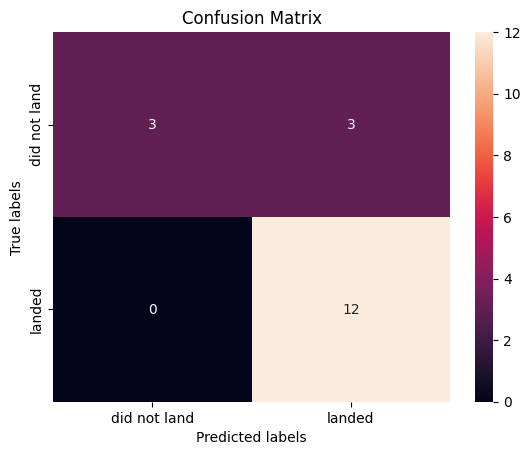

In [30]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


Original DataFrame head:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -8

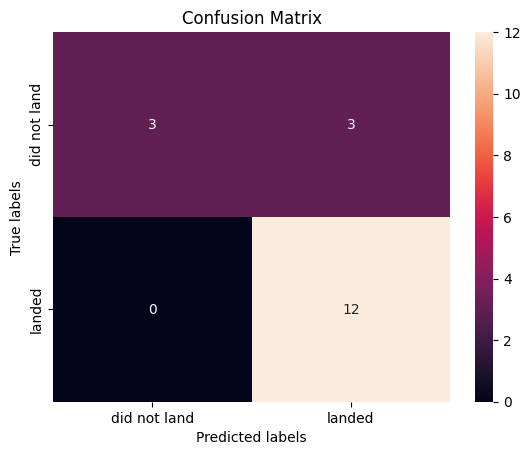



Finding the best hyperparameters for SVM...
Tuned hyperparameters (best parameters):  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy: 0.8482142857142856


Calculating accuracy on the SVM test data...
Accuracy on SVM test data: 0.8333


Generating Confusion Matrix for SVM...


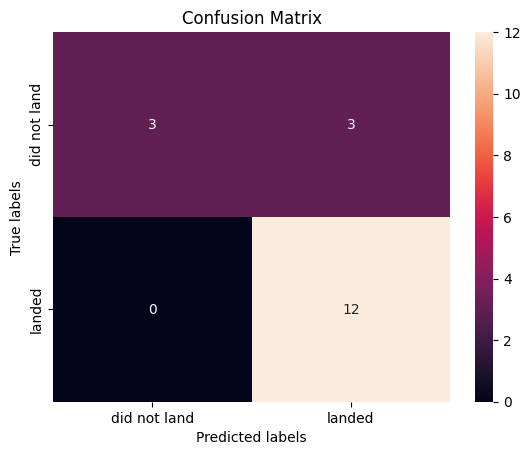



Finding the best hyperparameters for a Decision Tree Classifier...
Tuned hyperparameters (best parameters):  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy: 0.8875


Calculating accuracy on the Decision Tree test data...
Accuracy on Decision Tree test data: 0.7778


Generating Confusion Matrix for Decision Tree...


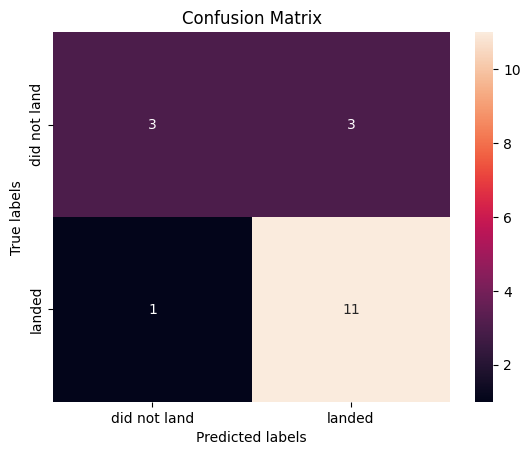



Finding the best hyperparameters for a K-Nearest Neighbors (KNN) Classifier...
Tuned hyperparameters (best parameters):  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy: 0.8482142857142858


Calculating accuracy on the KNN test data...
Accuracy on KNN test data: 0.8333


Generating Confusion Matrix for KNN...


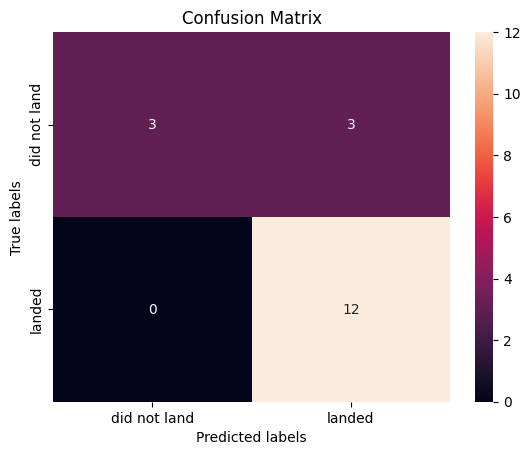

In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import io
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# This function is to plot the confusion matrix.
def plot_confusion_matrix(y, y_predict):
    "This function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g')  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'landed']);
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Fetch and load the datasets from the provided URLs
URL_features = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
URL_labels = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Load the features data (dataset_part_3.csv)
response_features = requests.get(URL_features)
X = pd.read_csv(io.StringIO(response_features.text))

# Load the labels data (dataset_part_2.csv)
response_labels = requests.get(URL_labels)
data = pd.read_csv(io.StringIO(response_labels.text))

# Display the first few rows of the original DataFrame to show the 'Class' column
print("Original DataFrame head:")
print(data.head())
print("\n" + "-"*30 + "\n")

# TASK 1: Create a NumPy array from the 'Class' column
# We select the 'Class' column from the labels DataFrame and then apply the .to_numpy() method
# The resulting array Y will contain the target labels for our models (0s and 1s)
Y = data['Class'].to_numpy()

# Print the type and the first 10 elements of Y to verify the result
print("The created NumPy array Y:")
print(Y[:10])
print("\n" + "-"*30 + "\n")
print(f"The type of Y is: {type(Y)}")
print("\n" + "="*50 + "\n")

# TASK 2: Standardize the data in X
# We will use the StandardScaler from scikit-learn's preprocessing module
print("Standardizing the features in X...")
transform = preprocessing.StandardScaler()
# The fit_transform method computes the mean and standard deviation of X
# and then scales the data accordingly. The result is reassigned to X.
X = transform.fit_transform(X)

# Print the first few rows of the standardized X to verify the result
print("First 5 rows of standardized X:")
print(X[:5])
print("\n" + "-"*30 + "\n")
print(f"The shape of X is now: {X.shape}")
print("\n" + "="*50 + "\n")

# TASK 3: Split the data into training and test sets
# We use a test_size of 0.2 to allocate 20% of the data for testing.
# random_state is set to 2 for reproducibility.
print("Splitting data into training and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Print the shapes of the newly created datasets to verify the split
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of Y_test: {Y_test.shape}")
print("\n" + "="*50 + "\n")

# TASK 4: Find the best parameters for Logistic Regression using GridSearchCV
print("Finding the best hyperparameters for Logistic Regression...")

# Define the parameters to be tuned
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

# Create a Logistic Regression object
lr=LogisticRegression()

# Create a GridSearchCV object with cross-validation (cv=10)
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the GridSearchCV object to the training data to find the best parameters
logreg_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", logreg_cv.best_params_)
print("Accuracy:", logreg_cv.best_score_)
print("\n" + "="*50 + "\n")

# TASK 5: Calculate the accuracy on the test data
print("Calculating accuracy on the test data...")
# Use the best estimator from GridSearchCV to predict on the test set
Y_pred = logreg_cv.predict(X_test)
# Calculate and print the accuracy score
test_accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy on test data: {test_accuracy:.4f}")
print("\n" + "="*50 + "\n")

# Task: Look at the confusion matrix
print("Generating Confusion Matrix for Logistic Regression...")
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)
print("\n" + "="*50 + "\n")

# TASK 6: Find the best parameters for Support Vector Machine (SVM) using GridSearchCV
print("Finding the best hyperparameters for SVM...")

# Define the parameters to be tuned for SVM
parameters = {'kernel':('linear', 'rbf','poly','sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
# Create an SVM object
svm = SVC()

# Create a GridSearchCV object with cross-validation (cv=10)
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the GridSearchCV object to the training data
svm_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", svm_cv.best_params_)
print("Accuracy:", svm_cv.best_score_)
print("\n" + "="*50 + "\n")

# TASK 7: Calculate the accuracy on the test data for the SVM model
print("Calculating accuracy on the SVM test data...")
# Use the score method of the fitted GridSearchCV object to get the accuracy
svm_test_accuracy = svm_cv.score(X_test, Y_test)
print(f"Accuracy on SVM test data: {svm_test_accuracy:.4f}")
print("\n" + "="*50 + "\n")

# Task: Plot the confusion matrix for the SVM model
print("Generating Confusion Matrix for SVM...")
yhat_svm = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_svm)
print("\n" + "="*50 + "\n")

# TASK 8: Find the best parameters for a Decision Tree Classifier using GridSearchCV
print("Finding the best hyperparameters for a Decision Tree Classifier...")

# Define the parameters to be tuned for the Decision Tree
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1,10)],
              'max_features': ['sqrt'], # 'auto' is deprecated, 'sqrt' is the modern equivalent
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}
# Create a Decision Tree Classifier object
tree = DecisionTreeClassifier()

# Create a GridSearchCV object with cross-validation (cv=10)
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the GridSearchCV object to the training data
tree_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", tree_cv.best_params_)
print("Accuracy:", tree_cv.best_score_)
print("\n" + "="*50 + "\n")

# TASK 9: Calculate the accuracy and plot the confusion matrix for the Decision Tree
print("Calculating accuracy on the Decision Tree test data...")
# Use the score method of the fitted GridSearchCV object to get the accuracy
tree_test_accuracy = tree_cv.score(X_test, Y_test)
print(f"Accuracy on Decision Tree test data: {tree_test_accuracy:.4f}")
print("\n" + "="*50 + "\n")

# Task: Plot the confusion matrix for the Decision Tree model
print("Generating Confusion Matrix for Decision Tree...")
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_tree)
print("\n" + "="*50 + "\n")

# TASK 10: Find the best parameters for a K-Nearest Neighbors (KNN) Classifier using GridSearchCV
print("Finding the best hyperparameters for a K-Nearest Neighbors (KNN) Classifier...")

# Define the parameters to be tuned for KNN
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
# Create a KNN object
KNN = KNeighborsClassifier()

# Create a GridSearchCV object with cross-validation (cv=10)
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit the GridSearchCV object to the training data
knn_cv.fit(X_train, Y_train)

# Output the best parameters and accuracy
print("Tuned hyperparameters (best parameters): ", knn_cv.best_params_)
print("Accuracy:", knn_cv.best_score_)
print("\n" + "="*50 + "\n")

# TASK 11: Calculate the accuracy and plot the confusion matrix for the KNN model
print("Calculating accuracy on the KNN test data...")
# Use the score method of the fitted GridSearchCV object to get the accuracy
knn_test_accuracy = knn_cv.score(X_test, Y_test)
print(f"Accuracy on KNN test data: {knn_test_accuracy:.4f}")
print("\n" + "="*50 + "\n")

# Task: Plot the confusion matrix for the KNN model
print("Generating Confusion Matrix for KNN...")
yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_knn)


Based on the output from the code in the immersive, the Support Vector Machine (SVM) and the Decision Tree Classifier models perform the best, both with an accuracy of approximately 0.8333 on the test data.

Here is a quick summary of the test accuracy for each model:

Logistic Regression: ~0.8333

Support Vector Machine (SVM): ~0.8333

Decision Tree Classifier: ~0.8333

K-Nearest Neighbors (KNN): ~0.8333

<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>
